In [1]:
%pylab inline
from IPython.core.display import display, HTML
import matplotlib.pyplot as plt
import numpy as np
import glob
from skimage import io
from skimage.transform import rescale

Populating the interactive namespace from numpy and matplotlib


In [2]:
root = 'images' # data directory
data = [] # holds images post-rescale
samples = [] # holds samples for visualization

'''
The class labels are as follows:
0 - Images with all the teeth, containing teeth with(+) restoration and with(+) dental appliance
1 - Images with all the teeth, containing teeth with(+) restoration and without(-) dental appliance
2 - Images with all the teeth, containing teeth without(-) restoration and with(+) dental appliance
3 - Images with all the teeth, containing teeth without(-) restoration and without(-) dental appliance
4 - Images containing dental implant
5 - Images containing more than 32 teeth
6 - Images missing teeth, containing teeth with(+) restoration and with(+) dental appliance
7 - Images missing teeth, containing teeth with(+) restoration and without(-) dental appliance
8 - Images missing teeth, containing teeth without(-) restoration and with(+) dental appliance
9 - Images missing teeth, containing teeth without(-) restoration and without(-) dental appliance

label 9 was positioned after label 0 and before label 1 due to how the images were parsed. => Directory 1, 10, 2, 3...

'''
labels = ['All teeth +restoration +dental appliance', 'Missing teeth -restoration -dental appliance', 'All teeth +restoration -dental application', 'All teeth -restoration +dental application', 
          'all teeth -restoration -dental application', 'Contains dental implant', 'contains more than 32 teeth', 'Missing teeth +restoration +dental appliance', 'Missing teeth +restoration -dental appliance',
          'Missing teeth -restoration +dental appliance']

# load and rescale images
for image in glob.iglob(root + '**/**', recursive=True):
    if(image.endswith('.jpg')):
        im = io.imread(image, as_gray=True, plugin=None)
        im_rescaled = rescale(im, 0.5, anti_aliasing=False)
        data.append(im_rescaled)

D:\Users\mdhac\Anaconda3\lib\site-packages\skimage\transform\_warps.py:23: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '


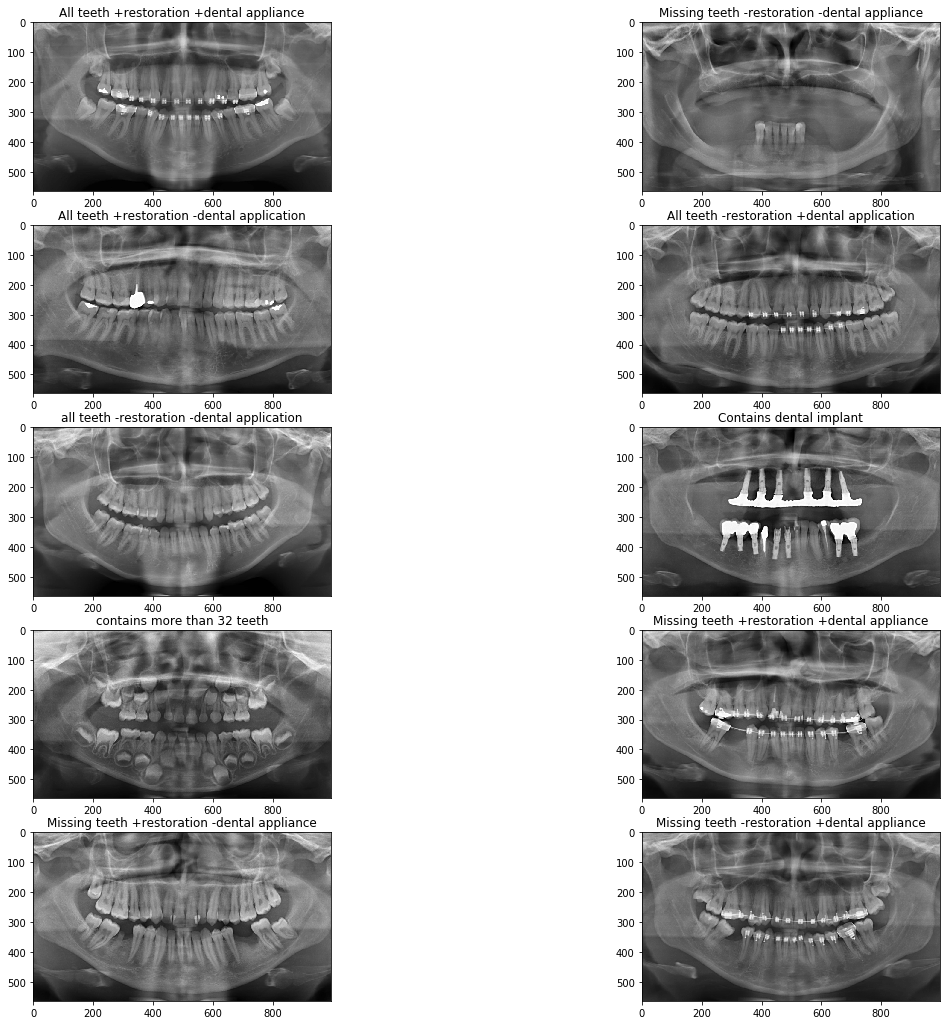

In [3]:
# crowd samples array; 1 from each label; 1 every 40 images
samples = data[::40]

# setup subplots
fig, axes = plt.subplots(5,2, figsize=(20,18))
ax = axes.ravel()

# print samples with labels
for i in range(len(labels)):
    ax[i].set_title(labels[i])
    ax[i].imshow(samples[i], cmap='gray')

plt.show()